In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy.linalg import inv
%matplotlib inline


## Rosenbrock Function
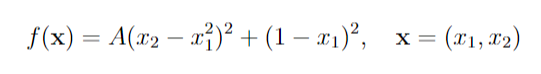




In [3]:
# Rosenbrock function with A = 1 and A = 100
def Rosenbrock_func(A, s):
  func = A * (s[1, 0] - s[0, 0]**2)**2 + (1 - (s[0, 0]))**2
  return func

## Armijo Rule
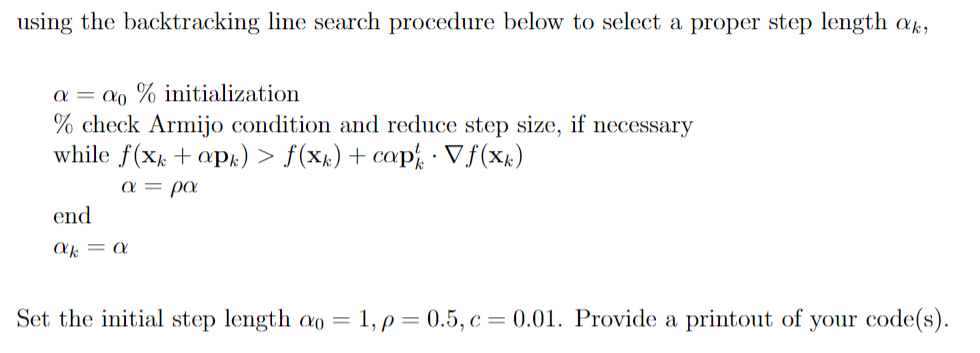

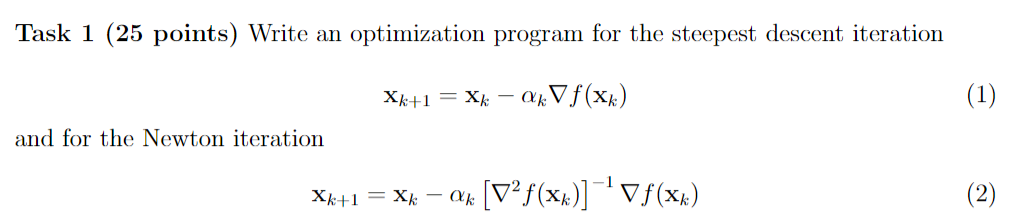

In [20]:
# f(x + alpha * (-gradient_function) - f(x) - c * alpha * ((-gradient_function^T) @ (-gradient_function)) > 0
def Armoji_rule(x, alpha_0, gradient_f, c, rho, A):
  alpha = alpha_0
  while Rosenbrock_func(A = A, s = (x + alpha * (-gradient_f)))  -  Rosenbrock_func(A = A, s = x) - c * alpha * ((-gradient_f.T)@(-gradient_f)) > 0:
    alpha = rho * alpha
  return alpha


In [46]:
# Initial guess point
# x0 = (-1.2, 1)
x_0 = np.array([[-1.2],[1]])

In [44]:
# Steepest descent iteration with A = 1
def sd_A_1(X, c, iteration, alpha_0, rho):
  
  cost = []
  norm = []
  x = X

  for i in range (iteration):
    # Gradient function of 1 * (x2 - x1^2)^2 + (1 - x1)^2
    # [[-4 * x1 * (x2 - x1^2) - 2 * (1 - x1)]
    #  [2 * (x2 - x1^2)]                     ]
    x1 = x[0, 0]
    x2 = x[1, 0]
    #gradient_f = np.array([[-4 * x[0,0] * (x[1, 0] - x[0, 0]**2) - 2 * (1 - x[0, 0])], [2 * (x[1, 0] - x[0, 0]**2)]])
    gradient_f = np.array([[-4 * x1 * (x2 - x1**2) - 2 * (1 - x1)], [2 * (x2 - x1**2)]])
    # Armijo condition
    alpha = Armoji_rule(x, 
                        alpha_0 = 1, 
                        gradient_f = gradient_f, 
                        c = 0.01,
                        rho = 0.5,
                        A = 1)
    
    # Steepest descent
    x = x - alpha * gradient_f
    f = 100 * (x2 - x1**2)**2 + (1 - (x1))**2
    cost.append(f)
    norm.append(LA.norm(gradient_f))
    # Convergence criteria ||Gradient_f(xk)|| < 10^-3
    if LA.norm(gradient_f)< 10**-3 :
      break

  print('norm after iteration:',LA.norm(gradient_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :', i,'\n')
  print('function valuve at x is :', f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()

  return


norm after iteration: 0.0009641448042559648 

x position after algrithm: [[0.99930877]
 [0.99866758]] 

iter took : 72 

function valuve at x is : 1.7083390241526816e-05 





cost value graph 



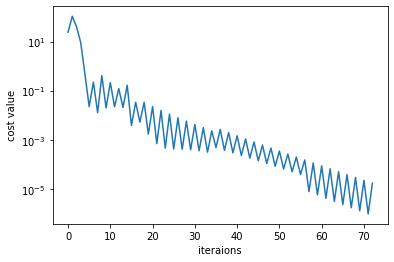





grad norm graph 



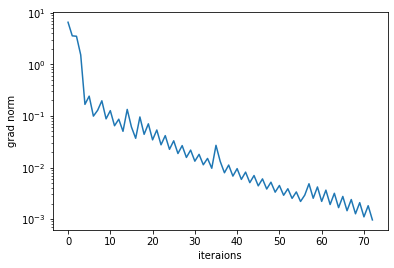

In [45]:
sd_A_1(X = x_0,
       c = 0.01, 
       iteration = 1000, 
       alpha_0 = 1, 
       rho = 0.5)

In [47]:
# Steepest descent iteration with A = 100
def sd_A_100(X, c, iteration, alpha_0, rho):
  cost = []
  norm = []
  x = X

  for i in range (iteration):
    # Gradient function of 100 * (x2 - x1^2)^2 + (1 - x1)^2
    # [[-400 * x1 * (x2 - x1^2) - 2 * (1 - x1)]
    #  [200 * (x2 - x1^2)]                     ]
    x1 = x[0, 0]
    x2 = x[1, 0]
    gradient_f = np.array([[-400 * x1 * (x2 - x1**2) - 2 * (1 - x1)], [200 * (x2 - x1**2)]])
    # Armijo condition
    alpha = Armoji_rule(x, 
                        alpha_0 = 1, 
                        gradient_f = gradient_f, 
                        c = 0.01,
                        rho = 0.5, 
                        A = 100)
    
    x = x - alpha * gradient_f
    f = 100 * (x2 - x1**2)**2 + (1 - (x1))**2
    cost.append(f)
    norm.append(LA.norm(gradient_f))
    if LA.norm(gradient_f)< 10**-3 :
      break

  print('norm after iteration:',LA.norm(gradient_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :', i,'\n')
  print('function valuve at x is :', f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()

  return

norm after iteration: 0.0009810722280310792 

x position after algrithm: [[0.99922864]
 [0.99845026]] 

iter took : 5255 

function valuve at x is : 6.008653769915841e-07 





cost value graph 



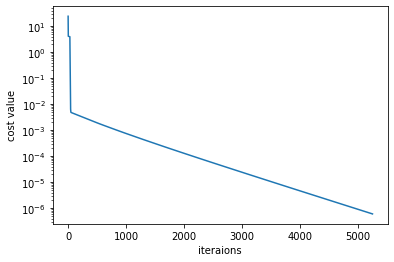





grad norm graph 



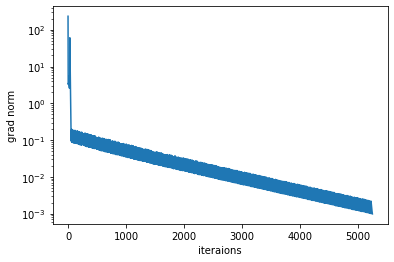

In [48]:
x_0 = np.array([[-1.2],[1]])
sd_A_100(X = x_0,
        c = 0.01, 
        iteration = 10000, 
        alpha_0 = 1, 
        rho = 0.5)

In [49]:
# Newton's iterations with A = 1
def newton_A_1(iteration, alpha_0, c, rho, X):
  cost = []
  norm = []
  x = X

  for i in range(iteration):
    # Hessian function of 1 * (x2 - x1^2)^2 + (1 - x1)^2
    # [[-4 * x2 + 12 * (x1)^2 + 2], [-4 * x1]
    #  [-4 * x1]                  , [2]      ]
    x1 = x[0, 0]
    x2 = x[1, 0]
    hessian_f = np.array([[-4 * x2 + 12 * (x1)**2 + 2, -4 * x1],
                          [-4 * x1, 2]])
    hessian_inv = inv(hessian_f)
    gradient_f = np.array([[4 * (x1**3) - 4 * x1 * x2 + 2 * x1 - 2], [2 * x2 - 2 * (x1**2)]])
    p = (-hessian_inv.T @ gradient_f)
    pk = p.T @ gradient_f
    alpha = alpha_0
    while(Rosenbrock_func(A = 1, s = x - alpha * (hessian_inv @ gradient_f)) - Rosenbrock_func(A = 1, s = x) + c * alpha * (pk[0, 0])) > 0:
      alpha = rho * alpha
    
    x = x - alpha * (hessian_inv @ gradient_f)
    f = (x1 - x2**2)**2 + (1 - (x2))**2
    cost.append(f)
    norm.append(f)
    if LA.norm(gradient_f) < 10**-3:
      break
    
  print('norm after iteration:',LA.norm(gradient_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :',i ,'\n')
  print('function valuve at x is :',f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()

  return

norm after iteration: 1.8997370848401163e-06 

x position after algrithm: [[1.]
 [1.]] 

iter took : 6 

function valuve at x is : 1.6431524350690426e-11 





cost value graph 



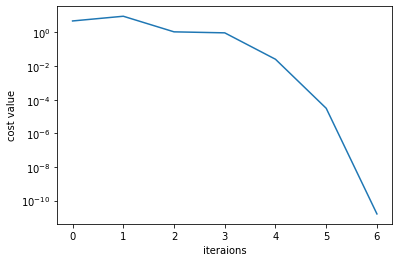





grad norm graph 



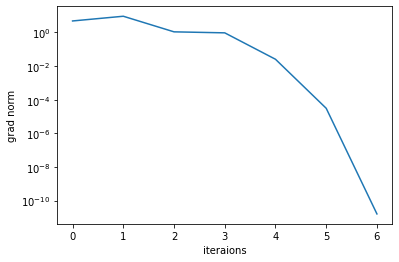

In [50]:
newton_A_1(X = x_0,
           alpha_0 = 1,
           c = 0.01,
           rho = 0.5,
           iteration = 10000)

In [55]:
# Newton's iterations with A = 100
def newton_A_100(iteration, alpha_0, c, rho, X):
  cost = []
  norm = []
  x = X

  for i in range(iteration):
    # Hessian function of 1 * (x2 - x1^2)^2 + (1 - x1)^2
    # [[-400 * x2 + 1200 * (x1)^2 + 2], [-400 * x1]
    #  [-400 * x1]                    , [200]      ]
    x1 = x[0, 0]
    x2 = x[1, 0]
    hessian_f = np.array([[-400 * x2 + 1200 * (x1)**2 + 2, -400 * x1],
                          [-400 * x1, 200]])
    hessian_inv = inv(hessian_f)
    gradient_f = np.array([[-400 * x1 * (x2 - x1**2) - 2 * (1 - x1)], [200 * (x2 - x1**2)]])
    p = (-hessian_inv.T @ gradient_f)
    pk = p.T @ gradient_f
    alpha = alpha_0
    while(Rosenbrock_func(A = 100, s = x - alpha * (hessian_inv @ gradient_f)) - Rosenbrock_func(A = 100, s = x) + c * alpha * (pk[0, 0])) > 0:
      alpha = rho * alpha
    
    x = x - alpha * (hessian_inv @ gradient_f)
    f = 100 * (x1 - x2**2)**2 + (1 - (x2))**2
    cost.append(f)
    norm.append(f)
    if LA.norm(gradient_f) < 10**-3:
      break
    
  print('norm after iteration:',LA.norm(gradient_f),'\n')
  
  print('x position after algrithm:', x,'\n')
  print('iter took :',i ,'\n')
  print('function valuve at x is :',f,'\n')

  print('\n')
  print('\n')


  print('cost value graph','\n')
  plt.plot(cost)
  plt.yscale('log')
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  plt.plot(norm)
  plt.yscale('log')
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()

  return

norm after iteration: 0.00011871675908289944 

x position after algrithm: [[1.]
 [1.]] 

iter took : 20 

function valuve at x is : 1.5046050473901109e-09 





cost value graph 



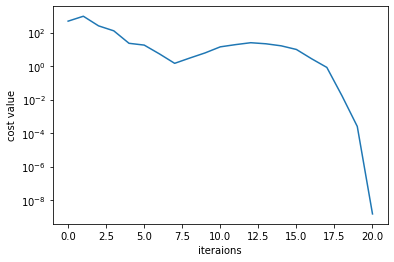





grad norm graph 



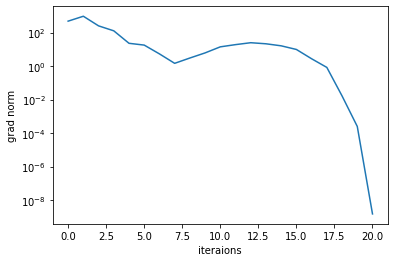

In [56]:
newton_A_100(X = x_0,
           alpha_0 = 1,
           c = 0.01,
           rho = 0.5,
           iteration = 10000)